# The World Happiness Report is a landmark survey of the state of global happiness. The scores are based on answers to the main life evaluation question asked in the poll.The happiness score  is estimated on six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity . Based on the records we need to bultd the Best Regression Model to predict the  "Happiness score"

## Importing Packages, Loading   data

In [ ]:
#Import Necessary Libararires 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')


####  Extracting the data from the csv file into a dataframe. Post loading Checking for vital statisitcs 

In [60]:
#readinng data from .CSV file
df=pd.read_csv('happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


###  DATA Quality  information  on the dataset 

In [61]:
# more infor on the dataset 
print('Size of dataset \n ',df.shape,'\n')
print('Details dataset\n' ,df.info(),'\n')
print('Checking for NULL/Missing values \n',df.isna().sum())


Size of dataset 
  (158, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int6

### Features of the data set 
### Its has 158 rows and 12 columns  
### Its has null or missing values 
### Its a Regression type problem

## EXPLORATORY DATA ANALYSIS

### DATA MANIPULATON for Catgorical values in Column REGION

In [62]:
#Data Manipulation 
lab_enc =LabelEncoder()
#Each and Every data in the features are categorical . 
# Categorical data will not have any outliers 
# so All the Care
df['Region']  = lab_enc.fit_transform(df['Region'])
 # Data cinvertion completed   


### DATA Visualization 
#### Removing  Country and Happiness rank as we are intersted to get Happiness score 

In [70]:
df_v= df.drop(['Country','Happiness Rank',],axis =1)
df_v.describe()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.120253,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,2.993321,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,3.000000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,4.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,8.000000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,9.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140



### Checking correlarion and plotting heat map 

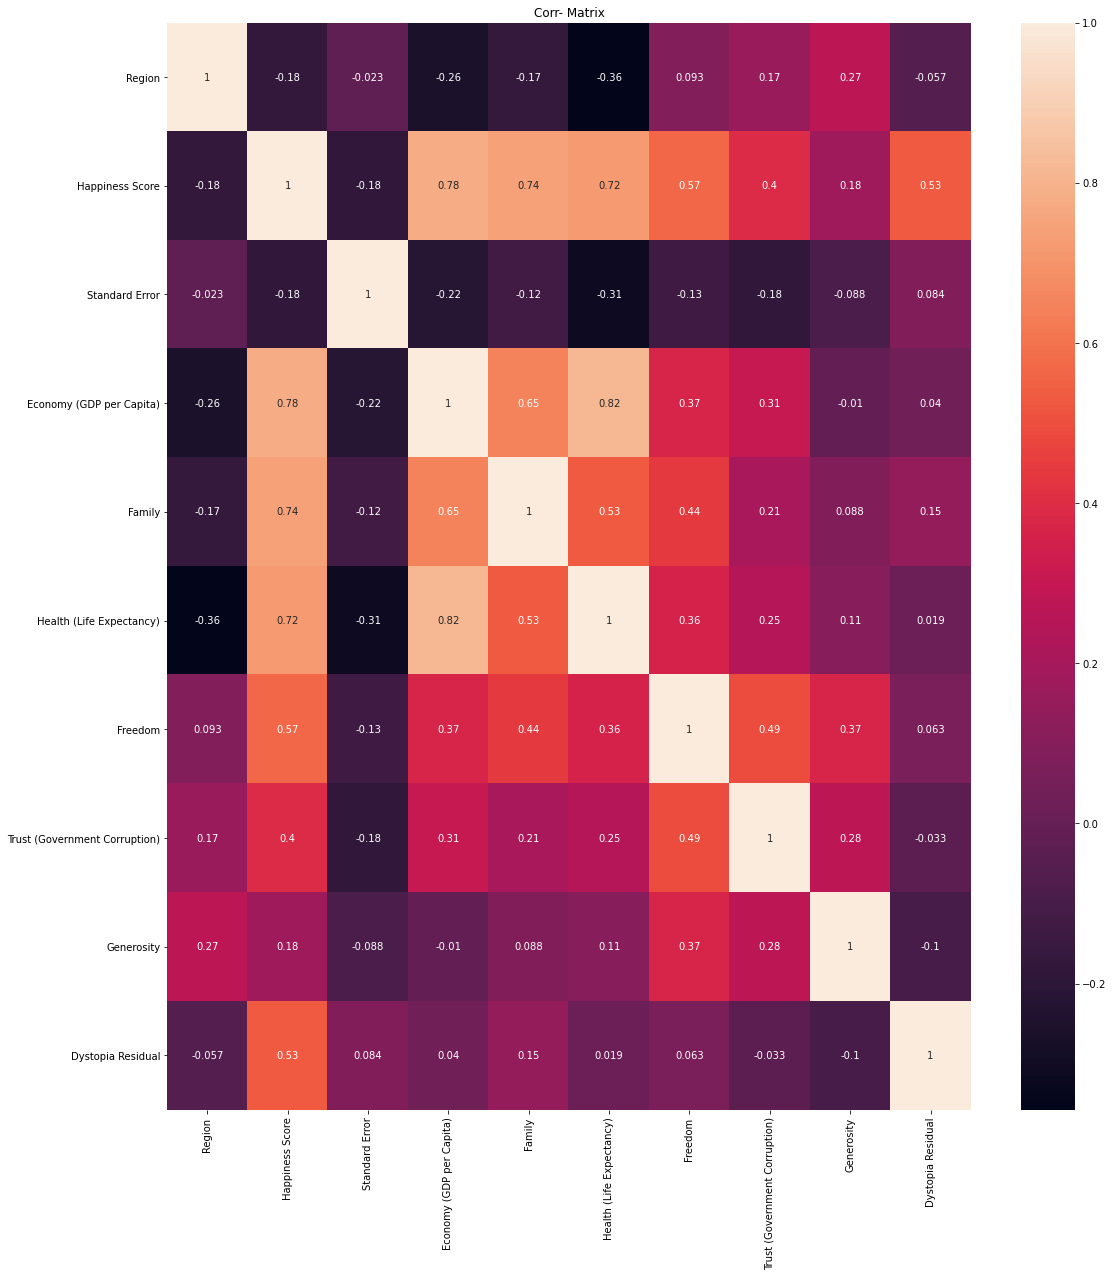

In [278]:
# Data is shewed in some segments 
#Checking correlarion and heat map 
df_v_corr = df_v.corr()
plt.figure(figsize=[18,20])
sns.heatmap(df_v_corr,annot=True)
plt.title('Corr- Matrix')
plt.show()

### Trying to sort the values as per the Heat map correlation 

In [68]:
df_v_corr['Happiness Score'].sort_values(ascending =False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Region                          -0.176791
Standard Error                  -0.177254
Name: Happiness Score, dtype: float64

### As ,per the values we can easily observe that , GDP, FAMILY.HEALTH,Freedom pays most imp role in happiness score

###  Plotting this features in shared plots

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

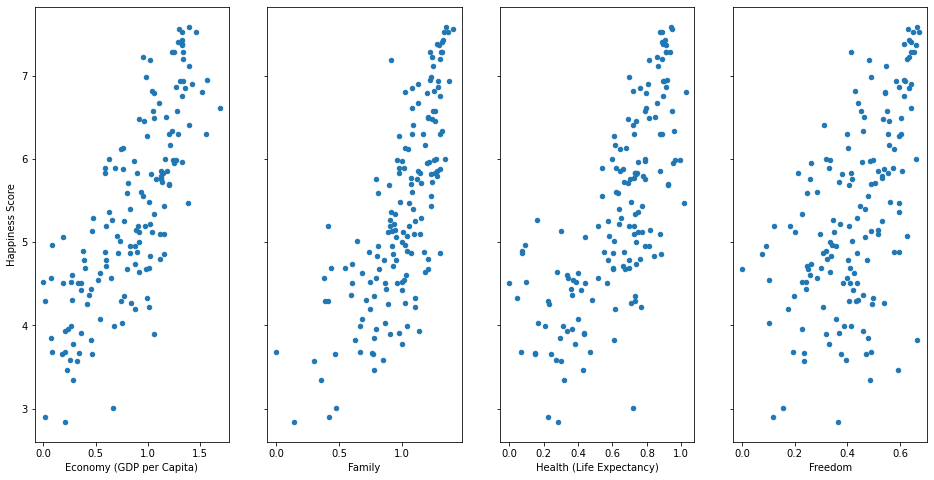

In [210]:
fig,axs = plt.subplots( 1,4, sharey = True)
df_v.plot(kind ='scatter',x='Economy (GDP per Capita)',y ='Happiness Score' ,ax= axs[0],figsize =(16,8))
df_v.plot(kind ='scatter',x='Family',y ='Happiness Score' ,ax= axs[1])
df_v.plot(kind ='scatter',x='Health (Life Expectancy)',y ='Happiness Score' ,ax= axs[2])
df_v.plot(kind ='scatter',x='Freedom',y ='Happiness Score' ,ax= axs[3])

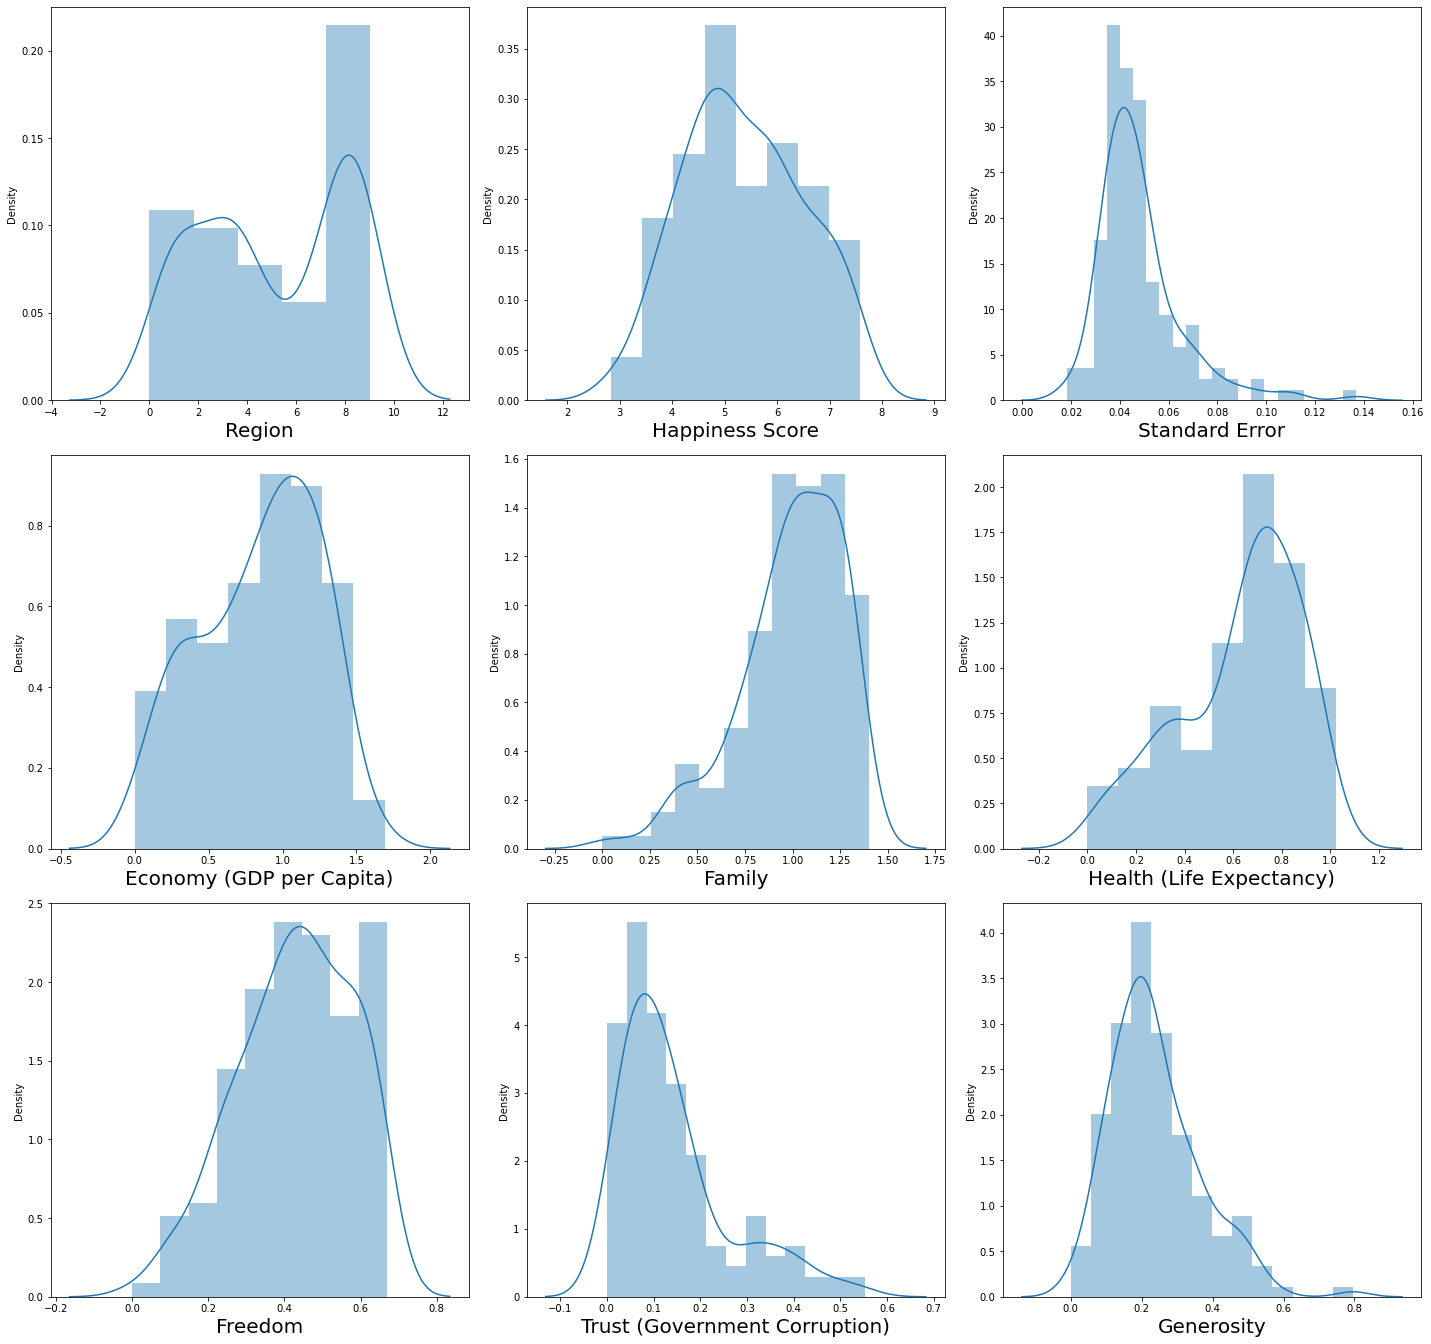

In [65]:

df_v= df.drop(['Country','Happiness Rank',],axis =1)
#Visualizartion
plt.figure(figsize =(20,25))
plt_num =4
for i in df_v:
    if plt_num<=12 :
        ax  =plt.subplot(4,3,plt_num)
        sns.distplot(df_v[i])
        plt.xlabel(i, fontsize =20)
    plt_num +=1
plt.tight_layout()

###  Scale the data using standard scaler 

In [156]:
# Scale the data using standard scaler 
# Setting X and y axis and splitting the data into train and test respectively.
x = df_v.drop(['Region','Happiness Score'],axis =1) 
y = df_v['Happiness Score']



In [157]:
#skewness check
x.skew(0)

Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [158]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

### Checking for Multicollinearity 

In [159]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = pd.DataFrame()
VIF['VIF'] =[variance_inflation_factor (x_scaled,i) for i in range (x_scaled.shape[1])]
VIF

,VIF
0,1.138096
1,4.106075
2,1.944623
3,3.336063
4,1.749657
5,1.440034
6,1.289276
7,1.056090


### The is no Multi-collinearity  in  the data as novalue are above 5 
### Finding Best Randome state  and Splitting data into test and train on 75:25 principle

In [289]:
from sklearn.linear_model import LinearRegression
my_acc = 0
rs = 0
for i in range (1,200) :
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.15,random_state=i)   
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred =lr.predict(x_test)
    acc= r2_score(y_test,y_pred)
    if acc>my_acc :
        my_acc =acc
        rs=i  
rs

54

In [202]:
#Thus SPlitting data 

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=54)  

## Modelling with Different Regression Techiniques

### Linear Regression

In [291]:
#Using  Regression models 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_y_pred = lr.predict(x_test)
R2_lr_score =r2_score(y_test,lr_y_pred)

print('R2_SCORE:',R2_lr_score)
print('Mean Absolute Error_LR:',mean_absolute_error(y_test,lr_y_pred))
print('Mean Squared Error_LR:', mean_squared_error(y_test,lr_y_pred))
print('Root Mean Squared Error_LR:', np.sqrt(mean_squared_error(y_test,lr_y_pred)))

R2_SCORE: 0.9999999507491493
Mean Absolute Error_LR: 0.00020492016952041356
Mean Squared Error_LR: 6.111732876106153e-08
Root Mean Squared Error_LR: 0.00024721919173288615


### R2_SCORE_LR: 0.9999999565851334
### Mean Absolute Error_LR: 0.00022425002245555215
### Mean Squared Error_LR: 7.201008141468724e-08
### Root Mean Squared Error_LR: 0.0002683469422495573

### X-Gradient Boosting

In [215]:
#Using  XGB models 
import xgboost as  xgb
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
xgb_y_pred = xgb.predict(x_test)
R2_xgb_score =r2_score(y_test,xgb_y_pred)
R2_xgb_score
print('R2_SCORE:',R2_xgb_score)
print('Mean Absolute Error_XGB:',mean_absolute_error(y_test,xgb_y_pred))
print('Mean Squared Error_XGB:', mean_squared_error(y_test,xgb_y_pred))
print('Root Mean Squared Error_XGB:', np.sqrt(mean_squared_error(y_test,xgb_y_pred)))

R2_SCORE: 0.893068467629666
Mean Absolute Error_LR: 0.3298359360694885
Mean Squared Error_LR: 0.17736201824551417
Root Mean Squared Error_LR: 0.42114370260697737


### R2_SCORE: 0.893068467629666
### Mean Absolute Error_XGB: 0.3298359360694885
### Mean Squared Error_XGB: 0.17736201824551417
### Root Mean Squared Error_XGB: 0.42114370260697737

### Support Decision Tree  Regressior

In [281]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt =dt.predict(x_test)
R2_DT_score =r2_score(y_test,y_pred_dt)
print('R2_SCORE_DT:',R2_DT_score)
print('Mean Absolute Error_DT:',mean_absolute_error(y_test,y_pred_dt))
print('Mean Squared Error_DT:', mean_squared_error(y_test,y_pred_dt))
print('Root Mean Squared Error_DT:', np.sqrt(mean_squared_error(y_test,y_pred_dt)))

R2_SCORE_DT: 0.8062912357113492
Mean Absolute Error_DT: 0.4863999999999999
Mean Squared Error_DT: 0.32129509999999983
Root Mean Squared Error_DT: 0.5668289865559099


### R2_SCORE_DT: 0.8062912357113492
### Mean Absolute Error_DT: 0.4863999999999999
### Mean Squared Error_DT: 0.32129509999999983
### Root Mean Squared Error_DT: 0.5668289865559099

### Support Vector  Regressior

In [216]:
# USING SVM Regression
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
svr_y_pred = svr.predict(x_test)
R2_svr_score =r2_score(y_test,svr_y_pred)
R2_svr_score
print('R2_SCORE:',R2_svr_score)
print('Mean Absolute Error_LR:',mean_absolute_error(y_test,svr_y_pred))
print('Mean Squared Error_LR:', mean_squared_error(y_test,svr_y_pred))
print('Root Mean Squared Error_LR:', np.sqrt(mean_squared_error(y_test,svr_y_pred)))

R2_SCORE: 0.8535346701575224
Mean Absolute Error_LR: 0.2947743366686372
Mean Squared Error_LR: 0.24293476328282454
Root Mean Squared Error_LR: 0.49288412764342954


### R2_SCORE: 0.8535346701575224
### Mean Absolute Error_LR: 0.2947743366686372
### Mean Squared Error_LR: 0.24293476328282454
### Root Mean Squared Error_LR: 0.49288412764342954

### Running Cross Validation 

In [293]:
#Cross Validation 
cvLR =cross_val_score(lr,x,y,cv=5)
cvXGB =cross_val_score(xgb,x,y,cv=5)
cvSVR=cross_val_score(svr,x,y,cv=5)
cvDTR=cross_val_score(dt,x,y,cv=5)
print ('\n CV score LR',cvLR.mean())
print ('\n CV score XGB',cvXGB.mean())
print ('\n CV score SVR',cvSVR.mean())
print ('\n CV score DTR',cvDTR.mean())



 CV score LR 0.9999981871007761

 CV score XGB -2.9624014458112002

 CV score SVR 0.028707305604232625

 CV score DTR -7.631289700203668


### SUPPORT VERCTOR MACINE REGRESSOR is the best one 
## HYPER PARAMETER TUNING TO BE DONE on SVR

In [257]:
from sklearn.model_selection import GridSearchCV

param ={'C' :[1,1.1,1.2,1.21,1.23,1.25,2,27] ,'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}
GSV = GridSearchCV(SVR(),param,cv=5)
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 1.1, 1.2, 1.21, 1.23, 1.25, 2, 27],
                         'coef0': [0.01, 10, 0.5], 'gamma': ('auto', 'scale')})

#### Best Parameters 

In [258]:
SVR().get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [259]:
GSV.best_params_

{'C': 1.25, 'coef0': 0.01, 'gamma': 'auto'}

### Modelling Using best parameters

In [260]:
#Using better parameters
from sklearn.svm import SVR
svr_t = SVR(C= 1.25,coef0= 0.01,gamma= 'auto')  #checking 
svr_t.fit(x_train, y_train)
svr_t_y_pred = svr_t.predict(x_test)
R2_svr_t_score =r2_score(y_test,svr_t_y_pred)
R2_svr_t_score
print('R2_SCORE_TUNED:',R2_svr_score)
print('Mean Absolute Error_SVR_TUNED :',mean_absolute_error(y_test,svr_t_y_pred))
print('Mean Squared Error_SVR_TUNED :', mean_squared_error(y_test,svr_t_y_pred))
print('Root Mean Squared Error_SVR_TUNED :', np.sqrt(mean_squared_error(y_test,svr_t_y_pred)))


R2_SCORE_TUNED: 0.8535346701575224
Mean Absolute Error_SVR_TUNED : 0.2755345532897583
Mean Squared Error_SVR_TUNED : 0.21287245749013367
Root Mean Squared Error_SVR_TUNED : 0.4613810328677737


### EFFICIANCY ACHIEVED 

R2_SCORE_TUNED: 0.8535346701575224
Mean Absolute Error_SVR_TUNED : 0.2755345532897583
Mean Squared Error_SVR_TUNED : 0.21287245749013367
Root Mean Squared Error_SVR_TUNED : 0.4613810328677737

In [294]:
#Checking efficiancy in random 

print(svr_t_y_pred[:50],)
print(svr_y_pred[:50],)
print(y_test[:50].values)


[7.45446902 6.21107373 4.56239521 6.63415462 4.734931   4.6529242
 6.14459861 4.89533926 3.64491688 4.99973494 6.08917874 4.90400262
 3.55919275 4.40809594 7.39364674 4.84928828 5.83657595 4.38987712
 5.85814372 4.72491155 6.80948209 7.41826733 5.85020032 3.91704142
 3.85871806 6.85227967 4.26229314 5.92237836 5.79879124 3.80876145
 4.948738   5.64732085 4.99239585 4.99927375 5.99023903 5.36229862
 4.68496482 4.78198397 5.72255731 5.63724125]
[7.41240977 6.18251742 4.61623688 6.63377947 4.77071705 4.66352662
 6.12422921 4.90056163 3.72607836 4.98295826 6.06273746 4.9083198
 3.61198471 4.47111852 7.38381332 4.83989594 5.83887193 4.39281959
 5.84913141 4.80365086 6.7435094  7.39668543 5.83687548 4.05363871
 3.86821031 6.78779727 4.26885122 5.93412087 5.7994043  3.80018211
 4.99295255 5.6299656  4.99013064 4.99720177 5.99716408 5.37032315
 4.75578849 4.77471751 5.68110704 5.60011486]
[5.129 2.839 5.14  4.971 3.681 6.505 7.187 4.867 5.889 5.878 3.896 4.788
 6.485 7.527 5.057 4.517 5.102 5.

### Saving the model

In [264]:
#Dumping the model 
import joblib as jl
jl.dump(svr_t,'Happiness_Report.pk')

['Happiness_Report.pk']

In [265]:
#Loading Model
hrpt = jl.load('Happiness_Report.pk')

In [273]:
Y_hrpt = hrpt.predict(x_test)
df_hrpt = pd.DataFrame({})

df_hrpt['Y_hrpt'] = Y_hrpt

In [295]:
Y_hrpt = hrpt.predict(x)
df['Calxulated Happiness Score'] = Y_hrpt

### Saving in the CSV FILE

In [297]:
df.to_csv('Happiness_Report_Pred.csv')